In [1]:
import cv2
import pandas as pd
import numpy as np 
import os

In [7]:
video = 'sample.mp4'
cap = cv2.VideoCapture(video)

# Variables to keep track of frame number
frame_number = 0
save_frames = False

output_directory = 'frames'
os.makedirs(output_directory, exist_ok=True)

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Check if we are within the desired time intervals (340-550 and 850 to the end)
    if (340 <= frame_number <= 550) or (frame_number >= 850):
        save_frames = True

    if save_frames:
        frame_filename = f'frame_{frame_number}.jpg'
        cv2.imwrite(frame_filename, frame)
    

    # Display the frame in the window
    cv2.imshow('Video Frame', frame)

    # Wait for user input (key press)
    key = cv2.waitKey(1) & 0xFF

    # Press 'q' to quit the video display
    if key == ord('q'):
        break

    frame_number += 1

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()

Extracted 1341 frames to 'frames'


In [ ]:
video = 'sample.mp4'
cap = cv2.VideoCapture(video)

# Set the frame rate (frames per second) for extraction
frame_rate = 10  # Adjust as needed

# Create a directory to save the frames (if it doesn't exist)
output_directory = 'frames'
os.makedirs(output_directory, exist_ok=True)

frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Extract frames at the specified frame rate
    if frame_count % frame_rate == 0:
        frame_filename = f'{output_directory}/frame_{frame_count}.jpg'
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

cap.release()
cv2.destroyAllWindows()

print(f"Extracted {frame_count} frames to '{output_directory}'")

In [12]:
frames2_cheking = os.path.join(os.getcwd(),'frames2')
# Specify the file path where you want to store the number
file_path = "number.txt"
for idx,name in enumerate(os.listdir(frames2_cheking)):
    num_img = name.split(".")[0].split("_")[1]
    # Open the file in write mode and store the number as text
    with open(file_path, "a") as file:
        file.write(str(num_img) + "\n")


In [42]:
import cv2
import os

# Load the video file
video_path = 'sample.mp4'  # Change to your video file path
cap = cv2.VideoCapture(video_path)

data = []
# Read the frame numbers from "number.txt"
with open("number.txt", "r") as file:
    for num in file:
        frame_number = int(num.strip())
        data.append(frame_number)

# Set the desired directory to store the output frames
output_directory = 'frames_2'  # Change to your desired directory
os.makedirs(output_directory, exist_ok=True)

# Loop through the video frames
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Save the frame if it matches one of the specified frame numbers
    if frame_count in data:
        print(f"Saving frame {frame_count}")
        output_path = os.path.join(output_directory, f"frame_{frame_count}.png")
        
        # Resize the frame to 480x480 pixels
        frame_resized = cv2.resize(frame, (640, 640))
        
        cv2.imwrite(output_path, frame_resized)
    
    frame_count += 1

cap.release()
cv2.destroyAllWindows()


Saving frame 340
Saving frame 341
Saving frame 342
Saving frame 343
Saving frame 344
Saving frame 376
Saving frame 424
Saving frame 425
Saving frame 426
Saving frame 427
Saving frame 428
Saving frame 429
Saving frame 430
Saving frame 431
Saving frame 432
Saving frame 433
Saving frame 434
Saving frame 435
Saving frame 436
Saving frame 458
Saving frame 459
Saving frame 460
Saving frame 461
Saving frame 462
Saving frame 463
Saving frame 464
Saving frame 465
Saving frame 466
Saving frame 467
Saving frame 468
Saving frame 469
Saving frame 470
Saving frame 471
Saving frame 472
Saving frame 502
Saving frame 503
Saving frame 504
Saving frame 505
Saving frame 506
Saving frame 507
Saving frame 508
Saving frame 509
Saving frame 510
Saving frame 555
Saving frame 556
Saving frame 557
Saving frame 558
Saving frame 559
Saving frame 810
Saving frame 811
Saving frame 812
Saving frame 813
Saving frame 814
Saving frame 815
Saving frame 816
Saving frame 817
Saving frame 818
Saving frame 819
Saving frame 8

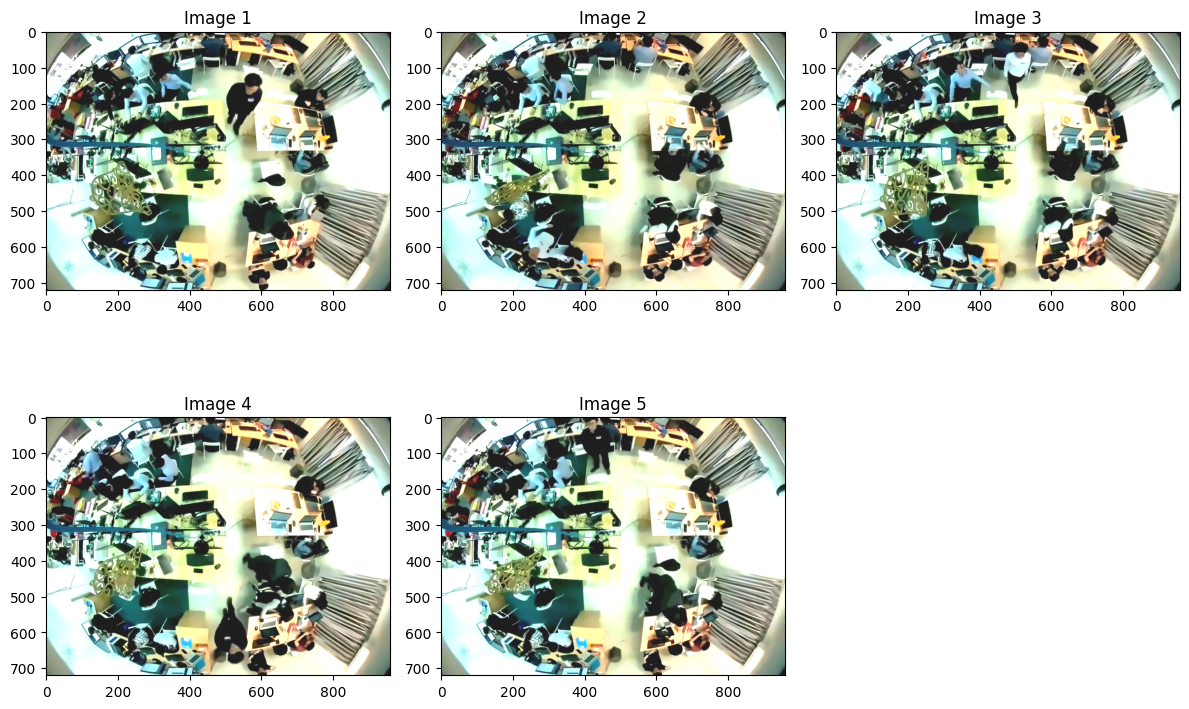

In [40]:
import os
import cv2
import matplotlib.pyplot as plt

checking = os.path.join(os.getcwd(), 'checking')

# List of image filenames
image_filenames = os.listdir(checking)

# Calculate the number of rows and columns based on the number of images
num_images = len(image_filenames)
num_rows = int(num_images ** 0.5)
num_columns = (num_images + num_rows - 1) // num_rows

# Create a new figure
plt.figure(figsize=(12, 8))

for idx, img_name in enumerate(image_filenames):
    img_path = os.path.join(checking, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load the image in color mode
    if img is None:
        print(f"Error reading image: {img_path}")
        continue

    # Apply denoising to the color image
    denoised_image = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    # Enhance the denoised image (adjust brightness and contrast)
    alpha = 1.5  # Contrast control (1.0 is no change)
    beta = 30    # Brightness control (0 is no change)

    enhanced_image = cv2.convertScaleAbs(denoised_image, alpha=alpha, beta=beta)

    # Create subplots for each image
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {idx + 1}')

# Adjust subplot spacing for a better layout
plt.tight_layout()

# Display all images
plt.show()


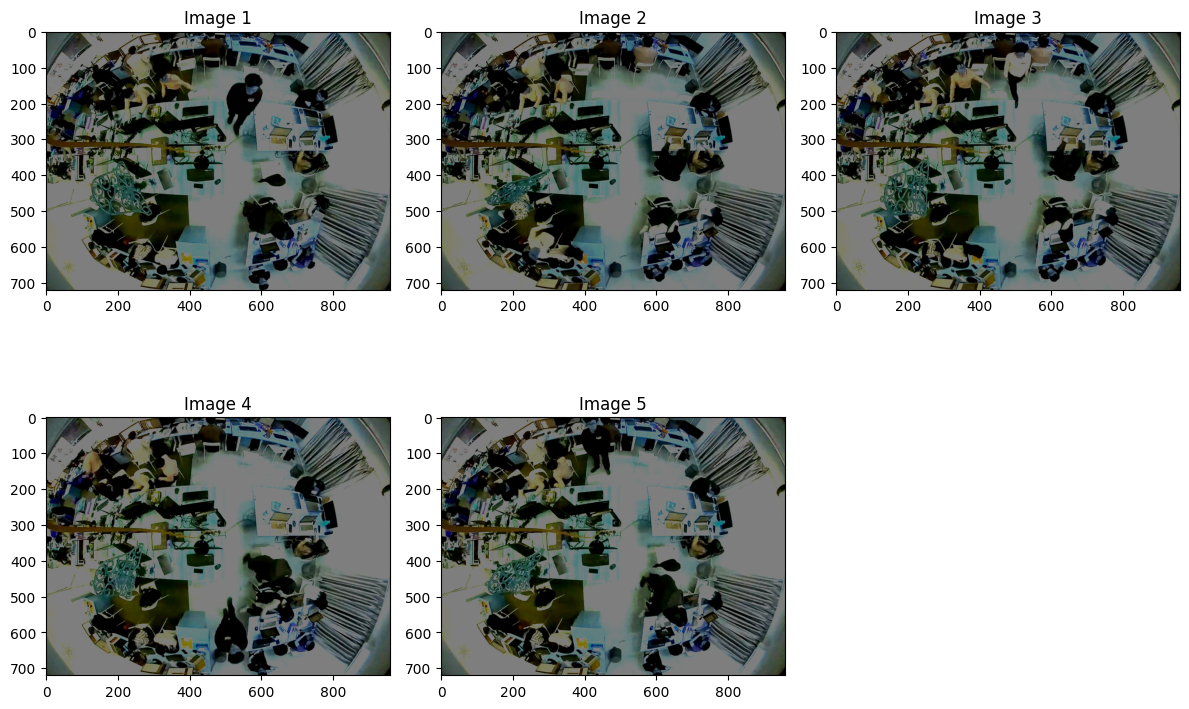

In [54]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

checking = os.path.join(os.getcwd(), 'checking')

# List of image filenames
image_filenames = os.listdir(checking)

# Calculate the number of rows and columns based on the number of images
num_images = len(image_filenames)
num_rows = int(num_images ** 0.5)
num_columns = (num_images + num_rows - 1) // num_rows
# Create a new figure
plt.figure(figsize=(12, 8))

for idx, img_name in enumerate(image_filenames):
    img_path = os.path.join(checking, img_name)
    img = cv2.imread(img_path)  # Load the image in color mode
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is None:
        print(f"Error reading image: {img_path}")
        continue

    # Apply denoising to the color image
   
    dst = cv2.blur(img,(2,2))
    # Sharpen the denoised image
    kernel = np.array([[0,-1,0  ],
                 [-1,6,-1],
                [0,-1,0]])

    sharpened_image = cv2.filter2D(dst, -1, kernel)

    brightness = -1
    # Adjusts the contrast by scaling the pixel values by 2.3
    contrast = 0.5
    image2 = cv2.addWeighted(sharpened_image, contrast, np.zeros(sharpened_image.shape, sharpened_image.dtype), 0, brightness)
    # apply guassian blur on src image

    frame_filename = os.path.join(checking,f'{img_name}_enhance.jpg')
    cv2.imwrite(frame_filename, image2)


    # Create subplots for each image
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.imshow(image2)
    plt.title(f'Image {idx + 1}')

# Adjust subplot spacing for a better layout
plt.tight_layout()

# Display all images
plt.show()
